# Gradient-based Learning : The Object of GBL
## SGD : Stochastic Gradient Descent
### momentum : 관성
### minimum : local, global -> local minimum 에 갇히지 않게 하이퍼파라미터 조정이 필요하다.

In [35]:
def f(x): return 1/10 * (x-10)**2
def df_dx(x): return 2/10*(x-10)

x = 3 # 초깃값 x를 n으로 설정
ITERATIONS = 10 # 총 n번의 update를 할 것
print(f'Initial x: {x}')
for iter in range(ITERATIONS):
    dy_dx = df_dx(x)
    x = x - dy_dx # x := x - (dy/dx)
    print(f'{iter + 1}-th x: {x:.4f}')



Initial x: 3
1-th x: 4.4000
2-th x: 5.5200
3-th x: 6.4160
4-th x: 7.1328
5-th x: 7.7062
6-th x: 8.1650
7-th x: 8.5320
8-th x: 8.8256
9-th x: 9.0605
10-th x: 9.2484


Initial x: 3
Initial x: 3
Initial x: 3


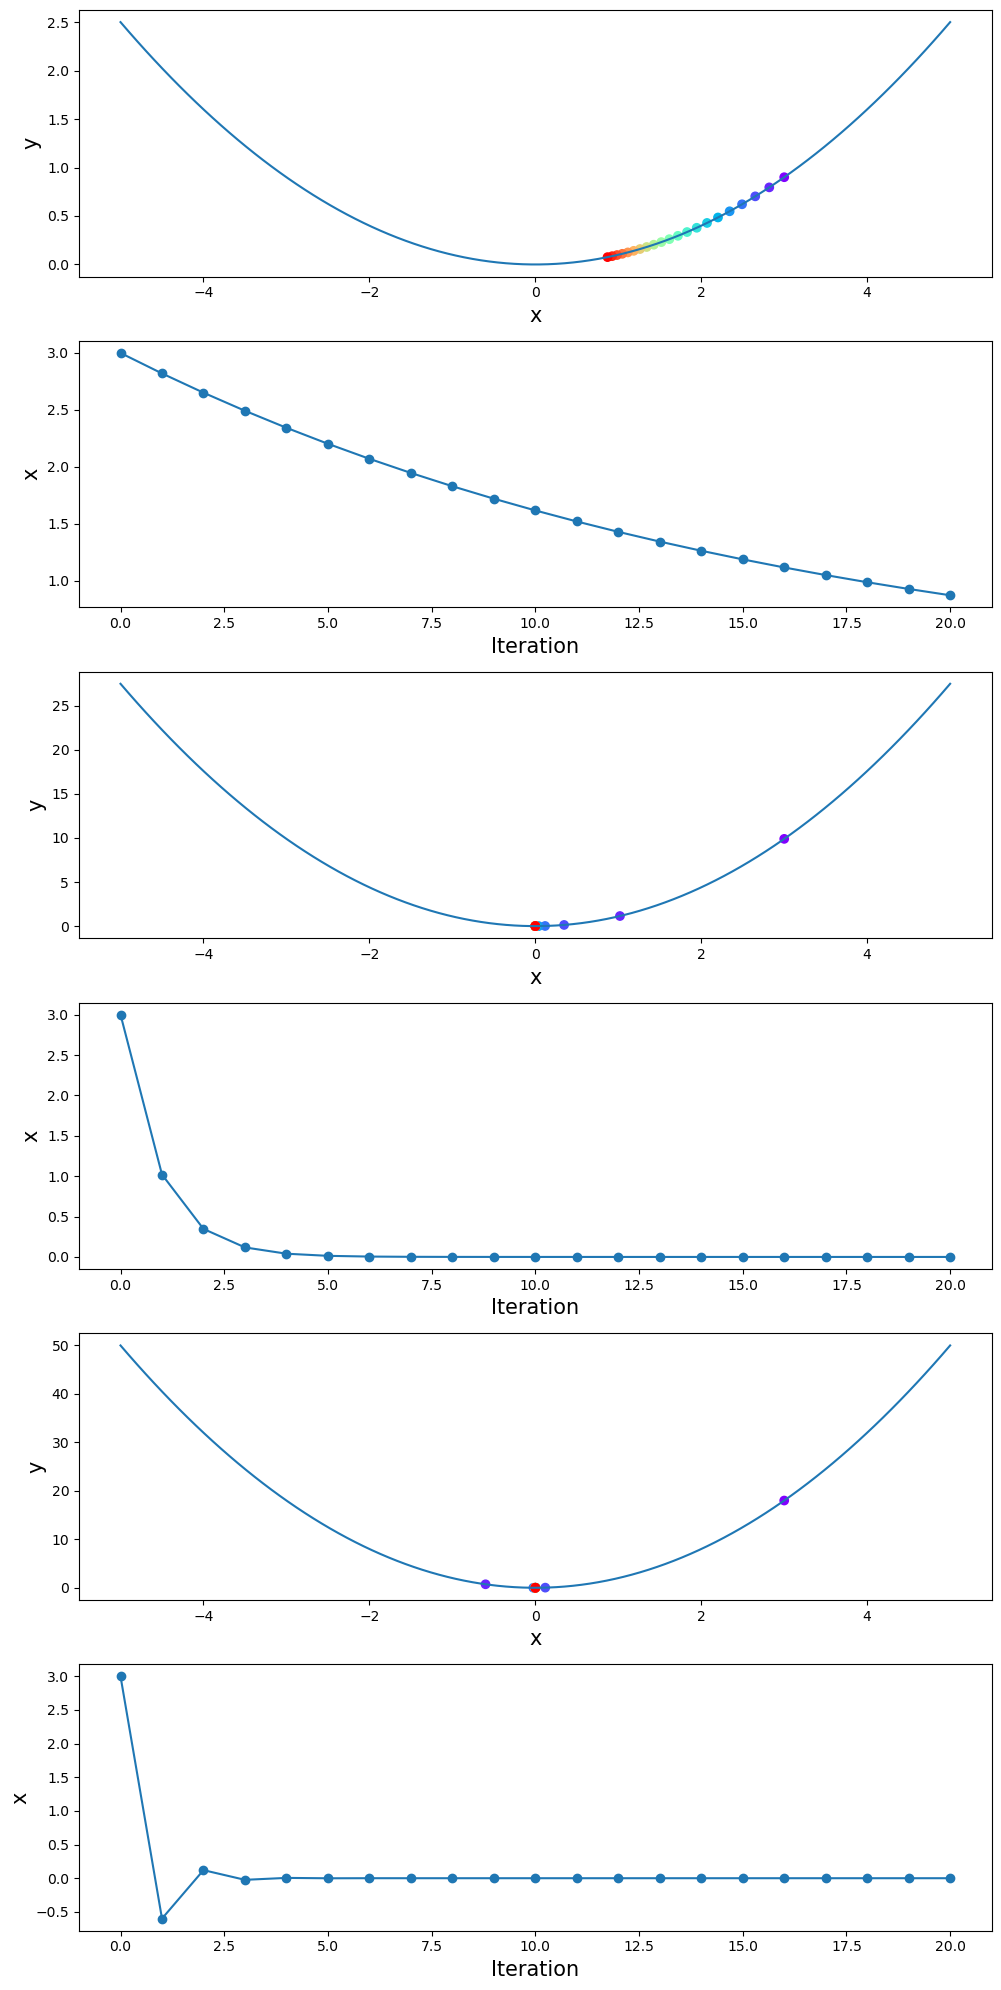

In [85]:
import numpy as np


def f(x, grad): return grad * ((x)**2)
def df_dx(x, grad): return 2 * grad *(x)

gradient = [1/10, 1/8, 1/6]
gradient = [1/10, 1.1, 2]
ITERATIONS = 20 # 총 n번의 update를 할 것
lr = 0.3 # learning rate

import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(gradient)*2, 1, figsize=(10,20))


for idx, grade in enumerate(gradient):
    x = 3 # 초깃값 x를 n으로 설정
    x_track, y_track = [x], [f(x, grade)] # 업데이트되는 x, y를 저장하기 위한 list
    print(f'Initial x: {x}')
    for iter in range(ITERATIONS):
        dy_dx = df_dx(x, grade)
        x = x - lr * dy_dx # learning rate 적용

        x_track.append(x)
        y_track.append(f(x, grade))
        # print(f'{iter + 1}-th  x: {x:.4f}')

    function_x = np.linspace(-5, 5, 100)
    function_y = f(function_x, grade)

    axes[idx*2].plot(function_x, function_y)
    axes[idx*2].scatter(x_track, y_track, c=range(ITERATIONS + 1), cmap='rainbow')
    axes[idx*2].set_xlabel('x', fontsize=15)
    axes[idx*2].set_ylabel('y', fontsize=15)

    axes[idx*2+1].plot(x_track, marker='o')
    axes[idx*2+1].set_xlabel('Iteration', fontsize=15)
    axes[idx*2+1].set_ylabel('x', fontsize=15)


fig.tight_layout()


## 미분계수가 크면 업데이트 스텝이 커짐.
1/10 -> 1/8 -> 1/6<br>
계수가 너무 커지면 발산해버림 : gradient exploding<br>
gradient exploding 방지를 위해 learning rate 도입됨


Initial x: -3.0, 1.0
1-th  x1:x2 = -2.7000 : 0.9000
2-th  x1:x2 = -2.4300 : 0.8100
3-th  x1:x2 = -2.1870 : 0.7290
4-th  x1:x2 = -1.9683 : 0.6561
5-th  x1:x2 = -1.7715 : 0.5905
6-th  x1:x2 = -1.5943 : 0.5314
7-th  x1:x2 = -1.4349 : 0.4783
8-th  x1:x2 = -1.2914 : 0.4305
9-th  x1:x2 = -1.1623 : 0.3874
10-th  x1:x2 = -1.0460 : 0.3487
11-th  x1:x2 = -0.9414 : 0.3138
12-th  x1:x2 = -0.8473 : 0.2824
13-th  x1:x2 = -0.7626 : 0.2542
14-th  x1:x2 = -0.6863 : 0.2288
15-th  x1:x2 = -0.6177 : 0.2059
16-th  x1:x2 = -0.5559 : 0.1853
17-th  x1:x2 = -0.5003 : 0.1668
18-th  x1:x2 = -0.4503 : 0.1501
19-th  x1:x2 = -0.4053 : 0.1351
20-th  x1:x2 = -0.3647 : 0.1216


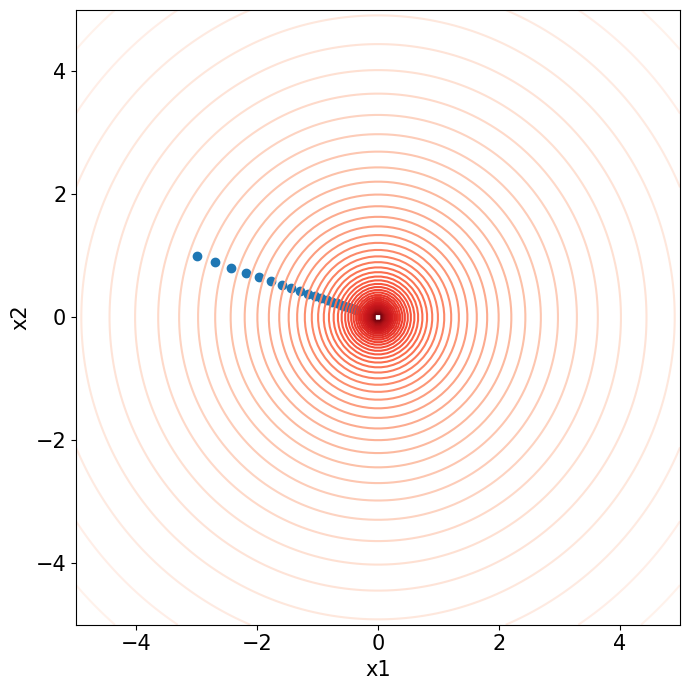

In [64]:
import numpy as np
import matplotlib.pyplot as plt
def f(x1, x2, grad): return ((grad*(x1))**2) + ((grad*(x2))**2)
def df_dx(x, grad): return grad * 2 * x

ITERATIONS = 20 # 총 n번의 update를 할 것
x1, x2 = -3.0, 1.0 # init x1, x2
grad = 1/6 # 계수 coefficient
lr = 0.3 # learning rate

x1_track, x2_track, y_track = [x1], [x2], [f(x1, x2, grad)]
print(f'Initial x: {x1}, {x2}')
for iter in range(ITERATIONS):
    dy_dx1 = df_dx(x1, grad)
    dy_dx2 = df_dx(x2, grad)
    x1 = x1 - lr * dy_dx1 # learning rate 적용
    x2 = x2 - lr * dy_dx2 # learning rate 적용

    x1_track.append(x1)
    x2_track.append(x2)
    y_track.append(f(x1, x2, grad))
    print(f'{iter + 1}-th  x1:x2 = {x1:.4f} : {x2:.4f}')

function_x1 = np.linspace(-5, 5, 100)
function_x2 = np.linspace(-5, 5, 100)
function_X1, function_X2 = np.meshgrid(function_x1, function_x2)
function_Y = np.log(f(function_X1, function_X2, grad))
# function_Y = (f(function_X1, function_X2))

fig, ax = plt.subplots(figsize=(7,7))
ax.contour(function_X1, function_X2, function_Y, levels=50, cmap='Reds_r')
ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('x2', fontsize=15)
ax.tick_params(labelsize=15)

ax.scatter(x1_track, x2_track)
fig.tight_layout()


x1, x2 = 키, 학적. := 두변수의 단위가 다르고 스케일이 다르면 그래프가 찌그러지고 기계학습이 원활히 되지 않는다.<br>
데이터 전처리(정규화 등)을 통해 스케일을 통일 시킨다.<br>
그리고 모델의 성능을 높이기 위해 Learning rate 등 하이퍼파라미터 튜닝이 필요하다.<br>
베이즈 정리로 하이퍼파라미터 튜닝에 쓰이기도 한다.<br>

# Backpropagation
밑바닥 153p<br>
Chain Rule(연쇄법칙)을 이용하여 미분계수 구하기.<br>


In [ ]:
class Function1:
    def forward(self, x):
        z = x - 2
        return z
    
    def backward(self, dy_dz):
        self.dy_dx = 1
        self.dy_dx *= dy_dz # chain rule
        return self.dy_dx
    
class Function2:
    def forward(self, z):
        self.y = 2*(z**2)
        return self.y
    
    def backward(self):
        return self.y * 4

class FunctionUnion:
    def __init__(self):
        print(f'f(x) = 2*(x - 2)**2\n')
        self.f1 = Function1()
        self.f2 = Function2()

    def __call__(self, x):
        self.x = x
        self.forward(self.x)
        self.backward()
        self.print()
        
    def forward(self, x):
        self.x = x
        z = self.f1.forward(self.x)
        self.y = self.f2.forward(z)
        return self.y
    
    def backward(self):
        dy_dz = self.f2.backward()
        self.dy_dx = self.f1.backward(dy_dz)
        return self.dy_dx
    
    def print(self):
        print(f'---- x = {self.x} ----')
        print(f'순전파: f({self.x}) = {self.y}')
        print(f"역전파:f'({self.x}) = {self.dy_dx}\n")

f = FunctionUnion()

print(f'순전파 : {f.forward(4)}')
print(f'역전파 : {f.backward()}')
f.print()

X = [i for i in range(-1, 4)]
print(f'x = {X}')
for x in range(len(X)):
    f(x)


# 시그모이드 연쇄법칙을 이용한 미분

In [151]:
import numpy as np
class Function1:
    def forward(self, x):
        self.z1 = -x
        return self.z1
    def backward(self, dy_dz2):
        dz2_dz1 = -1
        dy_dz1 = dy_dz2 * dz2_dz1
        return dy_dz1

class Function2:
    def forward(self, z1):
        self.z2 = np.exp(z1)
        return self.z2
    def backward(self, dy_dz3):
        dz3_dz2 = self.z2
        dy_dz2 = dy_dz3 * dz3_dz2
        return dy_dz2

class Function3:
    def forward(self, z2):
        self.z3 = 1 + z2
        return self.z3
    def backward(self, dy_dz4):
        dz4_dz3 = 1
        dy_dz3 = dy_dz4 * dz4_dz3
        return dy_dz3

class Function4:
    def forward(self, z3):
        self.z4 = 1/(z3)
        return self.z4
    def backward(self):
        dy_dz4 = -(self.z4 ** 2)
        return dy_dz4

class Function:
    def __init__(self):
        self.f1 = Function1()
        self.f2 = Function2()
        self.f3 = Function3()
        self.f4 = Function4()
    def forward(self, x):
        z1 = self.f1.forward(x)
        z2 = self.f2.forward(z1)
        z3 = self.f3.forward(z2)
        y = self.f4.forward(z3)
        return y
    def backward(self):
        dy_dz4 = self.f4.backward()
        dy_dz3 = self.f3.backward(dy_dz4)
        dy_dz2 = self.f2.backward(dy_dz3)
        dy_dz1 = self.f1.backward(dy_dz2)
        return dy_dz1


f = Function()
z = 2
print(f'Sigmoid forward  z={z} : {f.forward(z)}')
print(f'Sigmoid backward z={z} : {f.backward()}')

class Sigmoid:
    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self):
        return (self.y * (1 - self.y))

t = Sigmoid()
print(f'정답확인용 순전파 z={z} : {t.forward(z)}')
print(f'정답확인용 역전파 z={z} : {t.backward()}')

Sigmoid forward  z=2 : 0.8807970779778823
Sigmoid backward z=2 : 0.1049935854035065
정답확인용 순전파 z=2 : 0.8807970779778823
정답확인용 역전파 z=2 : 0.10499358540350662


# BCELoss

In [ ]:
class BCELoss:
    def forward(self, y, pred):
        self.y, self.pred = y, pred
        self.j = -(self.y * np.log(self.pred) + (1 - self.y) * np.log(1 - self.pred))
        return self.j

    def backward(self):
        dJ_dPred = (self.pred - self.y)/(self.pred*(1 - self.pred))
        return dJ_dPred


In [1]:
import numpy as np
class AffineFunction:
    def __init__(self):
        self.w = np.random.randn(2)
        self.b = np.random.randn()
    def forward(self, x):
        self.x = x
        z = np.dot(self.w, x) + self.b
        return z
    def backward(self, dJ_dz, LR):
        dz_dw = self.x
        dz_db = 1
        dJ_dw = dJ_dz * dz_dw
        dJ_db = dJ_dz * dz_db
        self.w -= dJ_dw * LR
        self.b -= dJ_db * LR
        return dJ_dw

class Sigmoid:
    def forward(self, z):
        self.pred = 1 / (1 + np.exp(-z))
        return self.pred
    def backward(self, dJ_dp):
        dz_dp = (self.pred * (1 - self.pred))
        dJ_dz = dJ_dp * dz_dp
        return dJ_dz

class Model:
    def __init__(self):
        self.affine = AffineFunction()
        self.sigmoid = Sigmoid()

    def forward(self, x):
        z = self.affine.forward(x)
        pred = self.sigmoid.forward(z)
        return pred

    def backward(self, dJ_dp, LR):
        dJ_dz = self.sigmoid.backward(dJ_dp)
        dJ_dw = self.affine.backward(dJ_dz, LR)
        return dJ_dw

class BCELoss:
    def forward(self, y, pred):
        self.y, self.pred = y, pred
        J = -(self.y * np.log(self.pred) + (1 - self.y) * np.log(1 - self.pred))
        return J
    def backward(self):
        dJ_dp = (self.pred - self.y)/(self.pred * (1 - self.pred))
        return dJ_dp
    

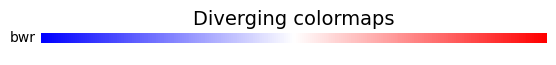

In [24]:
#!conda install -y colorspacious
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl


gradient = np.linspace(-0.5, 1.5, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)
        
plot_color_gradients('Diverging', ['bwr'])

In [ ]:
x_sample = np.linspace(-0.5, 1.5, 100)
X = []
y = []
for x1 in x_sample:
    for x2 in x_sample:
        y_ = np.logical_xor(x1>0.7, x2>0.7)
        X.append([x1, x2])
        y.append(1 if y_==True else 0)
        # print(y_, x1, x2)
X = np.array(X)
y = np.array(y)

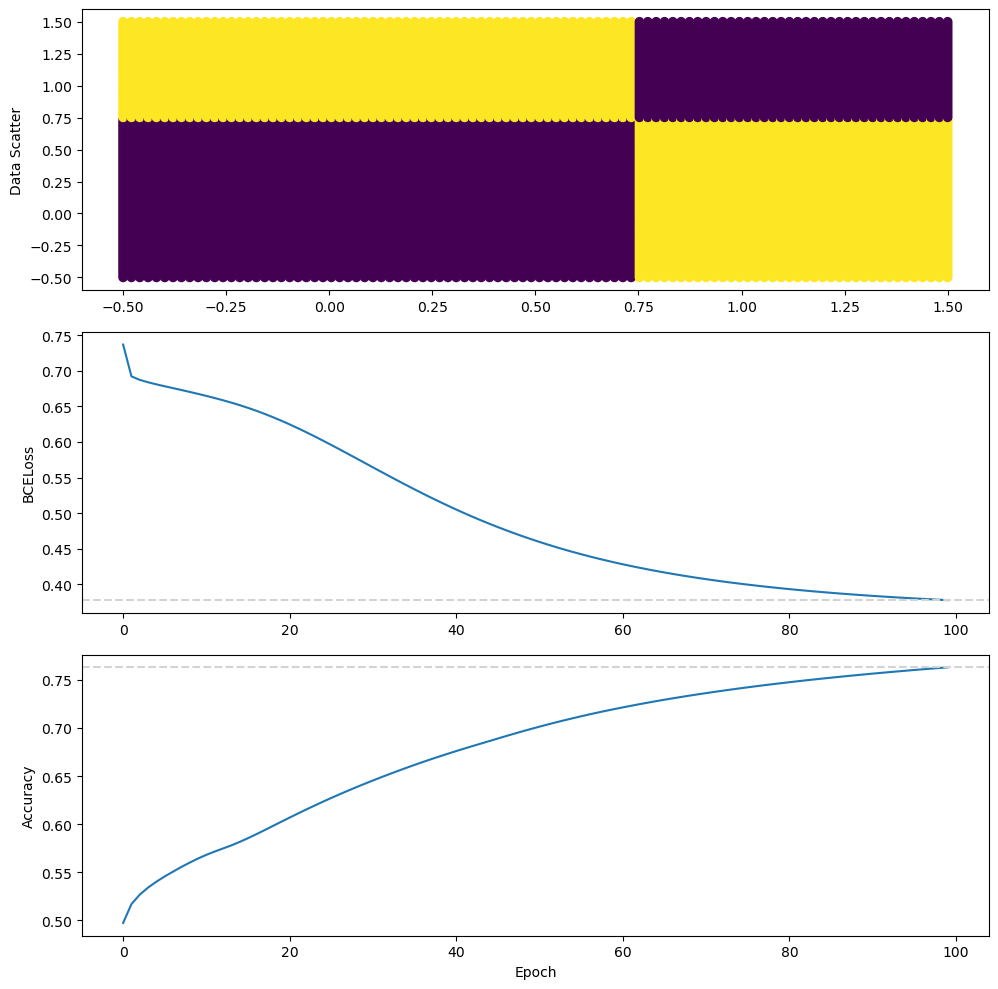

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# SEED = 10
# np.random.seed(SEED)
N_SAMPLES = 100
LR = 0.001
EPOCHS = 100

x_sample = np.linspace(-0.5, 1.5, N_SAMPLES)
X = []
y = []
for x1 in x_sample:
    for x2 in x_sample:
        y_ = np.logical_xor(x1>0.75, x2>0.75)
        X.append([x1, x2])
        y.append(1 if y_==True else 0)
        # print(y_, x1, x2)
X = np.array(X)
y = np.array(y)
# print(X.shape, y.shape)

m_nand = Model()
m_or = Model()
m_and = Model()
bce = BCELoss()

bcelosses = []
accuracies = []
threshold = 0.5
TP = 0
FN = 0
FP = 0
TN = 0

# for ax in axes.flatten():
# fig, axes = plt.subplots(4, 4, figsize=(10,10))

for epoch in range(EPOCHS):
    epoch_loss = 0
    predicts = []
    for X_, y_ in zip(X, y):
        # predict
        p1 = m_nand.forward(X_)
        p2 = m_or.forward(X_)
        pred = m_and.forward(np.array([p1, p2]))
        predicts.append(pred)

        # BCELoss
        j = bce.forward(y_, pred)
        epoch_loss += j

        # Backpropagation
        dJ_dp = bce.backward()
        dJ_dw = m_and.backward(dJ_dp, LR)
        m_nand.backward(dJ_dw[0], LR)
        m_or.backward(dJ_dw[1], LR)
        
        # Acuracy
        if (pred > threshold) and (y_ == 1): TP += 1
        elif (pred <= threshold) and (y_ == 1): FN += 1
        elif (pred > threshold) and (y_ == 0): FP += 1
        else: TN += 1


    bcelosses.append(epoch_loss/(N_SAMPLES**2))
    accuracy = (TP + TN)/(TP + FN + FP + TN)
    accuracies.append(accuracy)

    # ax plot
    # ax.imshow(np.array(predicts).reshape(100, -1), aspect='auto', cmap=mpl.colormaps['bwr'])


fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_ylabel('Data Scatter')

axes[1].plot(bcelosses)
axes[1].set_ylabel('BCELoss')
axes[1].axhline(min(bcelosses), color='lightgray', linestyle='--')
# axes[1].text(800,6, s=f'{bcelosses[-1]:.6f}')


axes[2].plot(accuracies)
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('Epoch')
axes[2].axhline(max(accuracies), color='lightgray', linestyle='--')
fig.tight_layout()

(100, 2) (100,)


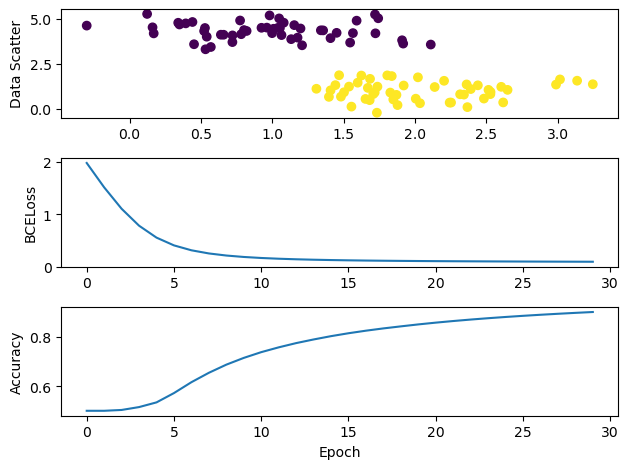

In [6]:
SEED = 0
np.random.seed(SEED)

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

N_SAMPLES = 100
LR = 0.001
EPOCHS = 30
X, y = make_blobs(n_samples=N_SAMPLES, centers=2, n_features=2, cluster_std=0.5, random_state=SEED)
print(X.shape, y.shape)
m = Model()
bce = BCELoss()

bcelosses = []
accuracies = []
threshold = 0.5
TP = 0
FN = 0
FP = 0
TN = 0
for epoch in range(EPOCHS):
    epoch_loss = 0
    for X_, y_ in zip(X, y):
        # predict
        pred = m.forward(X_)

        # train
        j = bce.forward(y_, pred)
        dJ_dp = bce.backward()
        m.backward(dJ_dp, LR) # update
        
        # BCELoss
        epoch_loss += j
        
        # Acuracy
        if (pred > threshold) and (y_ == 1): TP += 1
        elif (pred <= threshold) and (y_ == 1): FN += 1
        elif (pred > threshold) and (y_ == 0): FP += 1
        else: TN += 1

    bcelosses.append(epoch_loss/N_SAMPLES)
    accuracy = (TP + TN)/(TP + FN + FP + TN)
    accuracies.append(accuracy)

fig, axes = plt.subplots(3, 1)
function_x = np.linspace(0, 30, N_SAMPLES*EPOCHS)

axes[0].scatter(x=X[:,0], y=X[:,1], c=y)
axes[0].set_ylabel('Data Scatter')

axes[1].plot(bcelosses)
axes[1].set_ylabel('BCELoss')

axes[2].plot(accuracies)
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('Epoch')
fig.tight_layout()